Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

Read the given Datasets

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_training_dataset.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msc_testing_dataset.csv')

Checking the data summary for the train_data

In [3]:
print(len(data_train),"\n")
print(data_train.shape,"\n")
print(data_train.isnull().sum().any(),"\n")
print(data_train.index,"\n")
print(data_train.columns,"\n")
print(data_train.info(),"\n")
print(data_train.count(),"\n")
print(data_train.head(),"\n")

3000 

(3000, 12) 

False 

RangeIndex(start=0, stop=3000, step=1) 

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB
None 

ro

Checking the statistical summary of the train_data

In [4]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,3000.0,2.990000,1.424281,1.0,2.0,3.0,4.0,5.0
bathroom,3000.0,1.489000,0.499962,1.0,1.0,1.0,2.0,2.0
kitchen,3000.0,1.522000,0.499599,1.0,1.0,2.0,2.0,2.0
french_door,3000.0,1.998333,0.813153,1.0,1.0,2.0,3.0,3.0
backyard,3000.0,0.490333,0.499990,0.0,0.0,0.0,1.0,1.0
furnished,3000.0,0.488667,0.499955,0.0,0.0,0.0,1.0,1.0
green_paint,3000.0,0.485000,0.499858,0.0,0.0,0.0,1.0,1.0
solar_power,3000.0,0.495667,0.500065,0.0,0.0,0.0,1.0,1.0
woodfloor,3000.0,0.512333,0.499931,0.0,0.0,1.0,1.0,1.0
qlm_security,3000.0,0.480667,0.499709,0.0,0.0,0.0,1.0,1.0


Checking the data summary for the test_data

In [5]:
print(len(data_test),"\n")
print(data_test.shape,"\n")
print(data_test.isnull().sum().any(),"\n")
print(data_test.index,"\n")
print(data_test.columns,"\n")
print(data_test.info(),"\n")
print(data_test.count(),"\n")
print(data_test.head(),"\n")

999 

(999, 12) 

False 

RangeIndex(start=0, stop=999, step=1) 

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB
None 

room    

Checking the statistical summary of the test_data

In [6]:
data_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,999.0,3.019019,1.413731,1.0,2.0,3.0,4.0,5.0
bathroom,999.0,1.491491,0.500178,1.0,1.0,1.0,2.0,2.0
kitchen,999.0,1.496496,0.500238,1.0,1.0,1.0,2.0,2.0
french_door,999.0,1.959960,0.809759,1.0,1.0,2.0,3.0,3.0
backyard,999.0,0.510511,0.500140,0.0,0.0,1.0,1.0,1.0
furnished,999.0,0.474474,0.499598,0.0,0.0,0.0,1.0,1.0
green_paint,999.0,0.523524,0.499696,0.0,0.0,1.0,1.0,1.0
solar_power,999.0,0.490490,0.500160,0.0,0.0,0.0,1.0,1.0
woodfloor,999.0,0.501502,0.500248,0.0,0.0,1.0,1.0,1.0
qlm_security,999.0,0.500501,0.500250,0.0,0.0,1.0,1.0,1.0


Data Spliting

In [7]:
X_train = data_train.drop('price', axis=1)
X_test = data_test.drop('price', axis=1)
y_train = data_train['price']
y_test = data_test['price']

Machine Learning Model:

*   Linear Regression

In [8]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

y_pred = l_reg.predict(X_test)

print("Intercept: \n",l_reg.intercept_)
print("Coefficients: \n",l_reg.coef_)

Intercept: 
 195.00000000000182
Coefficients: 
 [1000.  300.  500.  240.  560. 2000.  370. 1530. 1890.  440.  730.]


In [9]:
print(l_reg.score(X_train, y_train))

1.0


In [10]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 1.000
MSE: 169.000
RMSE: 13.000
MAE: 13.000


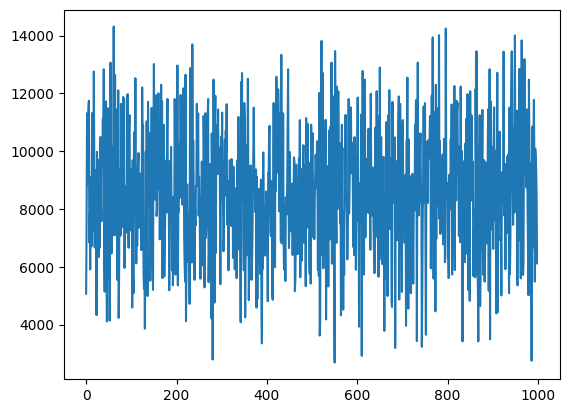

In [11]:
plt.plot(y_test)
plt.show()

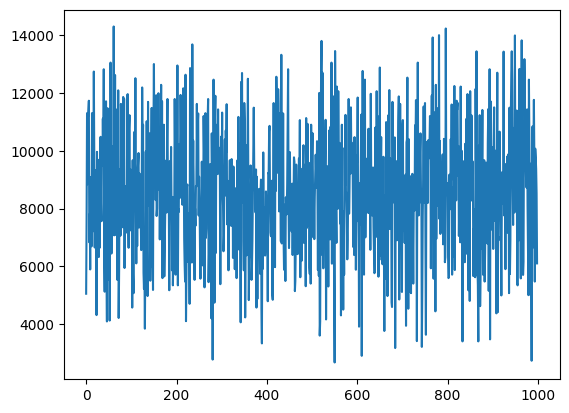

In [12]:
plt.plot(y_pred)
plt.show()

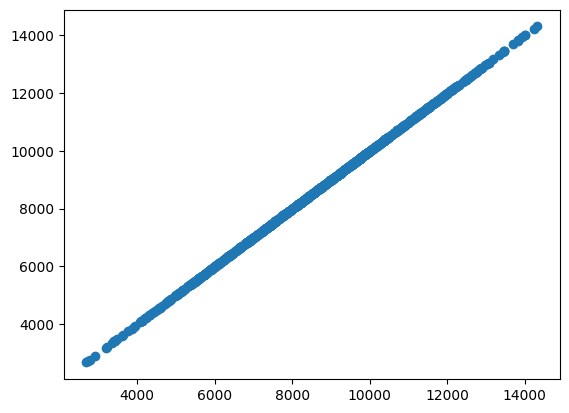

In [13]:
plt.scatter(y_test,y_pred)

In [14]:
#Defining a function 'make_plot()' for direct comparison of the Actual and Predicted Regression Values through plotting of graph.
def make_plot(Actual, Predicted):
  plt.plot(Actual, color="red", label="Actual")
  plt.plot(Predicted, color="blue", label="Predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing Actual and Predicted Regression Values")
  plt.tight_layout()
  plt.show()

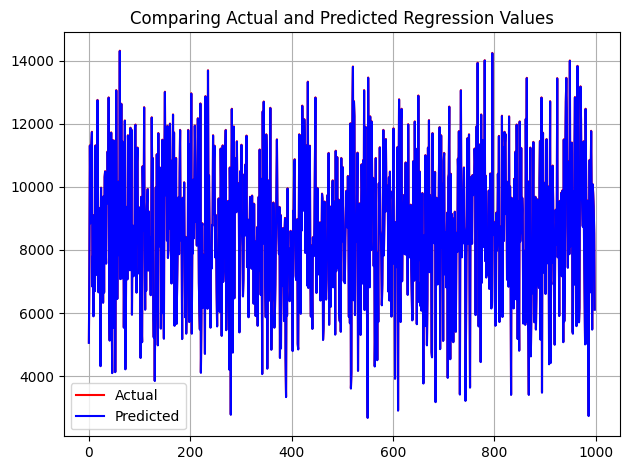

In [15]:
make_plot(y_test, y_pred)

Machine Learning Model:

*   Random Forest RF

In [16]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(rf_model.score(X_train, y_train))
print(mean_absolute_error(y_test,y_pred_rf))

0.9984624644095288
171.74944944944946


In [17]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred_rf)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred_rf)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred_rf))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred_rf)))

R-squared: 0.990
MSE: 51451.997
RMSE: 226.830
MAE: 171.749


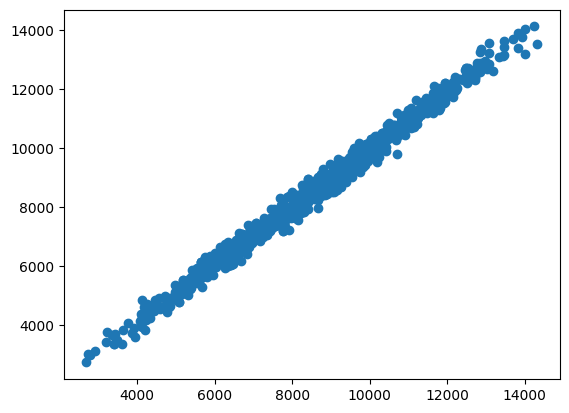

In [18]:
plt.scatter(y_test,y_pred_rf)

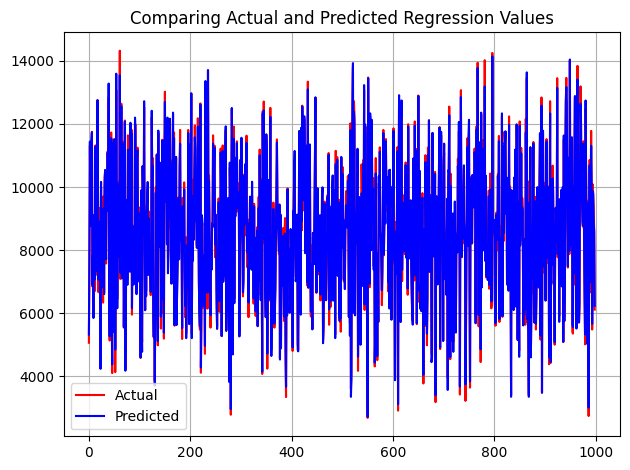

In [19]:
make_plot(y_test, y_pred_rf)

['bathroom', 'green_paint', 'qlm_security', 'french_door', 'kitchen', 'backyard', 'club_access', 'solar_power', 'woodfloor', 'furnished', 'room'] 

[0.004769696042716887, 0.00683913840139542, 0.008752937457407238, 0.008821648853154585, 0.0114337710763734, 0.01448610230302617, 0.025954999429237444, 0.11363439649290495, 0.17849795325939546, 0.19750605733023946, 0.42930329935414896] 

[(0.42930329935414896, 'room'), (0.19750605733023946, 'furnished'), (0.17849795325939546, 'woodfloor'), (0.11363439649290495, 'solar_power'), (0.025954999429237444, 'club_access'), (0.01448610230302617, 'backyard'), (0.0114337710763734, 'kitchen'), (0.008821648853154585, 'french_door'), (0.008752937457407238, 'qlm_security'), (0.00683913840139542, 'green_paint'), (0.004769696042716887, 'bathroom')] 



Text(0.5, 1.0, 'Features_importances')

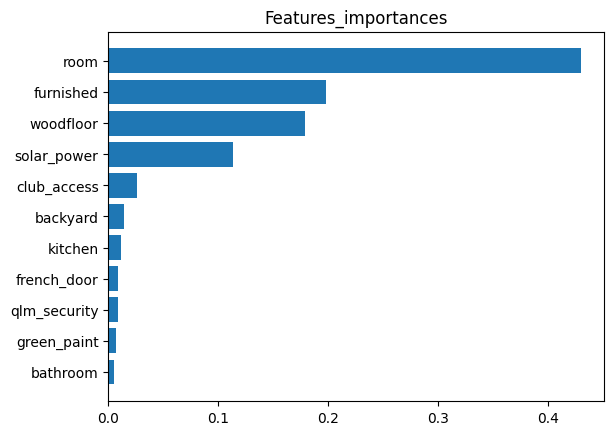

In [20]:
importances = pd.Series(rf_model.feature_importances_)
features = rf_model.feature_names_in_
features_importances = sorted(zip(importances,features),reverse=True)
keys = [k[1] for k in features_importances ] [::-1]
values = [k[0] for k in features_importances ][::-1]
print(keys,'\n')
print(values,'\n')
print(features_importances,'\n')
plt.barh(keys, values)
plt.title('Features_importances')

Machine Learning Model:

*   KNearestNeighbors KNN


In [21]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(mean_absolute_error(y_test,y_pred_knn))

0.9471383275821861
471.3446303446304


In [22]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred_knn)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred_knn)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred_knn))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred_knn)))

R-squared: 0.930
MSE: 342800.263
RMSE: 585.491
MAE: 471.345


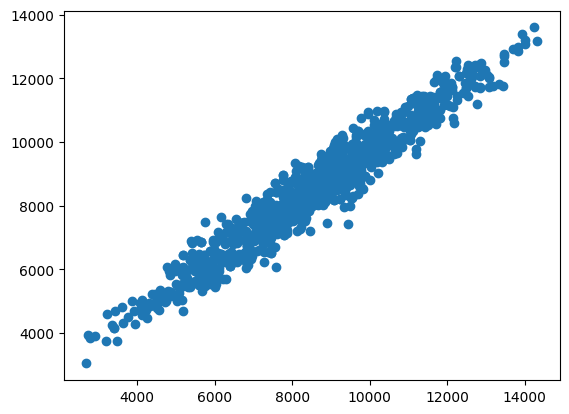

In [23]:
plt.scatter(y_test,y_pred_knn)

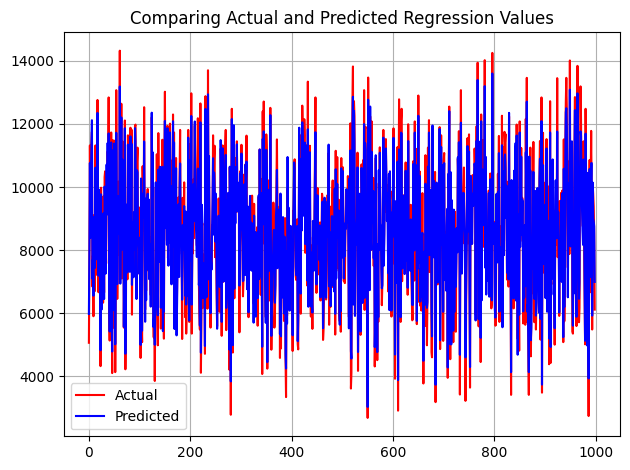

In [24]:
make_plot(y_test, y_pred_knn)

Comparing the three Machine Learning Models used through the Mean Absolute Error MAE

Text(0.5, 1.0, 'MAE for various regression algorithms')

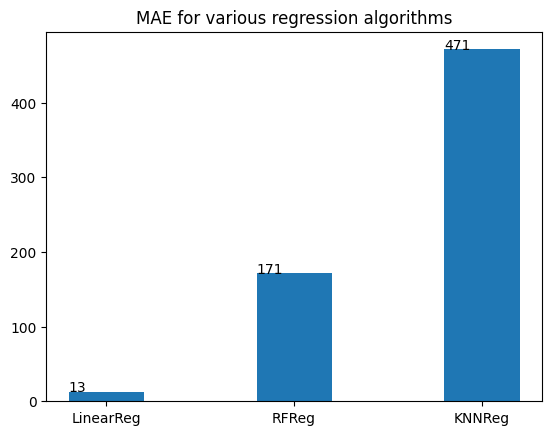

In [25]:
lin_mae = mean_absolute_error(y_test,y_pred)
rf_mae = mean_absolute_error(y_test,y_pred_rf)
knn_mae = mean_absolute_error(y_test,y_pred_knn)

errors = [lin_mae, rf_mae, knn_mae]
labels = ["LinearReg", "RFReg","KNNReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")